<a href="https://colab.research.google.com/github/AnshulSingh-eZ/Machine_Learning_Lab_23CS067/blob/main/Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
from ucimlrepo import fetch_ucirepo
iris = fetch_ucirepo(id=53)
df = pd.DataFrame(iris.data.features)
df['species'] = iris.data.targets

## **EDA**

In [76]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


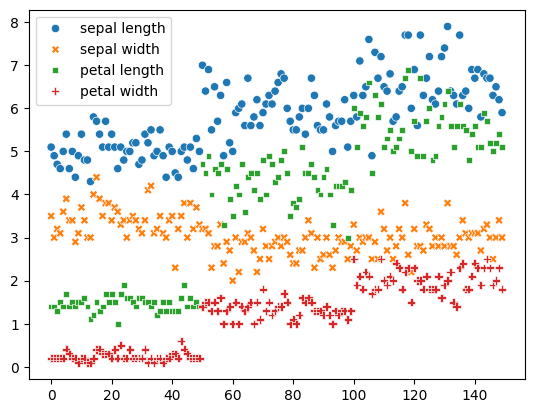

In [78]:
sns.scatterplot(df)
plt.show()

In [79]:
df['species'] = df['species'].str.lower()

A lot of different combinations could be plotted, petal length vs petal width provides clear distinguishable feature of all the flowers.

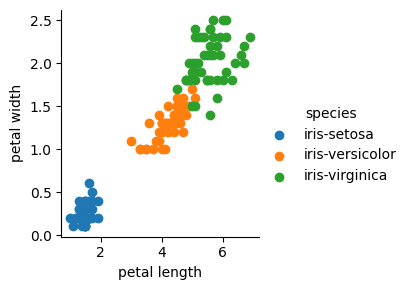

In [80]:
sns.FacetGrid(df, hue='species').map(plt.scatter, 'petal length', 'petal width').add_legend()

In [81]:
df = df.dropna()

In [82]:
df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
species,0


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [84]:
X = df.drop('species', axis = 1)
y = df['species']
le = LabelEncoder()
y = le.fit_transform(y)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=None)

Since our data is preprocessed and is ready, we are now building KNN classifier!!

In [86]:
def euclidian_dist(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [87]:
class knn(object):
  def __init__(self, k=3):
    self.k = k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    predictions=[]
    for x in X_test:
      prediction = self.__predict__(x)
      predictions.append(prediction)
    return predictions

  def __predict__(self, x):
    distances = []
    for x_train in self.X_train:
      distance = euclidian_dist(x, x_train)
      distances.append(distance)
    k_index = np.argsort(distances)[:self.k]
    k_labels = []
    for i in k_index:
      k_labels.append(self.y_train[i])
    mode = max(set(k_labels), key = k_labels.count)
    return mode


# As K (number of clusters) increases, accuracy decreases.

In [88]:
def helper(z, X_train, X_test, y_train, y_test):
  model = knn(z)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  n = len(predictions)
  correct = 0
  for i in range(n):
    if predictions[i] == y_test[i]:
      correct+=1
  return correct/n

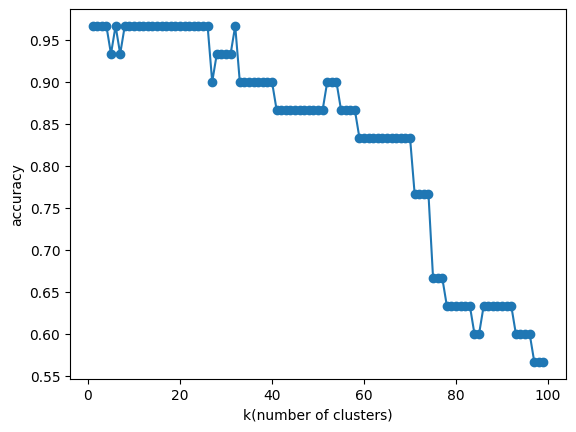

In [89]:
accuracy = []
for z in range(1,100):
  acc = helper(z, X_train, X_test, y_train, y_test)
  accuracy.append(acc)
plt.plot(range(1,100), accuracy, marker='o')
plt.xlabel("k(number of clusters)")
plt.ylabel("accuracy")
plt.show()

In [90]:
mxacc = max(accuracy)
best_k = accuracy.index(mxacc)+1

In [91]:
print(best_k)

1


In [92]:
acc = helper(best_k, X_train, X_test, y_train, y_test)
print("Accuracy :", acc)

Accuracy : 0.9666666666666667


1. Small k (e.g., 1 or 2):

    Very sensitive to noise in the training data.

    Can overfit: model captures tiny fluctuations, so predictions can be unstable.

    Low bias,  high variance.

2. Large k (e.g., 50+):

    Considers many neighbors, including far-away points from other classes.

    Can underfit: model becomes too “smooth” and ignores local structure.

    Low variance,  high bias.

3. Moderate k (sweet spot):

    Balances noise sensitivity and generalization.

    Usually gives highest accuracy.

## **Let's Run KNN on Wine Dataset!!**

Importing Wine Dataset

In [93]:
from ucimlrepo import fetch_ucirepo
wine = fetch_ucirepo(id=109)
df2 = pd.DataFrame(wine.data.features)
df2_targets = wine.data.targets

In [94]:
df2.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [95]:
df2_targets.head(10)

,class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [96]:
df2_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   178 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [97]:
df2.isnull().sum()

,0
Alcohol,0
Malicacid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0
Color_intensity,0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(df2.values, df2_targets.values.ravel(), test_size=0.2, random_state=None)

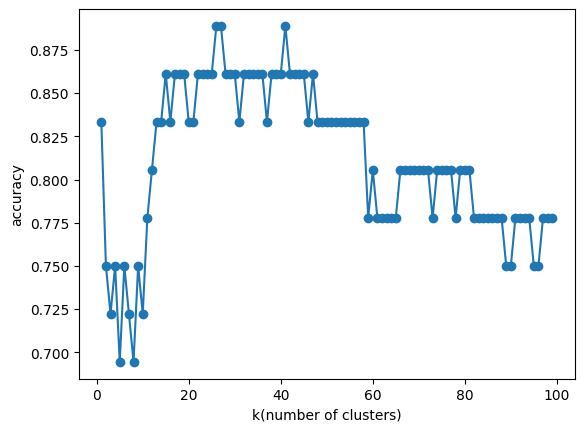

In [99]:
accuracy = []
for z in range(1,100):
  acc = helper(z, X_train, X_test, y_train, y_test)
  accuracy.append(acc)
plt.plot(range(1,100), accuracy, marker='o')
plt.xlabel("k(number of clusters)")
plt.ylabel("accuracy")
plt.show()

In [100]:
mxacc = max(accuracy)
best_k = accuracy.index(mxacc)+1

In [101]:
print(best_k)

26


In [102]:
acc = helper(best_k, X_train, X_test, y_train, y_test)
print("Accuracy :", acc)

Accuracy : 0.8888888888888888


So, our model is giving 96.67% accuracy on Iris Dataset and 88.88% accuracy on wine dataset after tuning k.

Since the splitting is done with (random_state=None), it splits dataset randomly everytime. The accuracies are therefore not consistent with every re-run of program.

To ensure consistent outcomes we could set random_state=42 or some other value.